In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/getting-a-good-nights-sleep/sleep_health_data.csv


In [2]:
sleep_health = pd.read_csv('/kaggle/input/getting-a-good-nights-sleep/sleep_health_data.csv')
sleep_health

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
# group occupations
occupation = sleep_health.groupby('Occupation')
# mean sleep duration for each occupation
mean_sleep_duration = occupation['Sleep Duration'].mean()
sorted_sleep_duration = mean_sleep_duration.sort_values()
# lowest avg sleep duration
lowest_sleep = sorted_sleep_duration.iloc[0]
lowest_sleep
# lowest sleep occupation
lowest_sleep_occ = sorted_sleep_duration.index[0]
# occupation with the lowest avg sleep duration
print(f'The occupation with the lowest sleep duration of {lowest_sleep} hours on average is {sorted_sleep_duration.index[0]}')

The occupation with the lowest sleep duration of 5.9 hours on average is Sales Representative


In [4]:
# mean sleep quality for each occupation
mean_sleep_quality = occupation['Quality of Sleep'].mean()
sorted_sleep_quality = mean_sleep_quality.sort_values()
# lowest avg sleep quality
lowest_sleep_quality = sorted_sleep_quality.iloc[0]
lowest_sleep_quality
#lowest sleep quality occ
lowest_sleep_quality_occ = sorted_sleep_quality.index[0]
# occupation with the lowest avg sleep quality
print(f'The occupation with the lowest sleep quality of {lowest_sleep_quality} is {sorted_sleep_quality.index[0]}')

The occupation with the lowest sleep quality of 4.0 is Sales Representative


In [5]:
# low sleep duration -> low sleep quality
if sorted_sleep_duration.index[0] == sorted_sleep_quality.index[0]:
    same_occ = True
    print(f'The occupation with the lowest sleep duration is the same with the lowest sleep quality.')
else:
    same_occ = False
    print(f'Lowest sleep duration and lowest sleep quality do not meet in the same occupation.')

The occupation with the lowest sleep duration is the same with the lowest sleep quality.


In [6]:
# ratio of insomniacs in each bmi category
insomniacs = sleep_health.loc[(sleep_health['Sleep Disorder'] == 'Insomnia')]
bmi_insomnia = insomniacs.groupby(['Sleep Disorder', 'BMI Category']).size().reset_index(name='Insomnia BMI Count')
bmi_insomnia

,Sleep Disorder,BMI Category,Insomnia BMI Count
0,Insomnia,Normal,9
1,Insomnia,Obese,4
2,Insomnia,Overweight,64


In [7]:
# total normal
total_normal = sleep_health.loc[sleep_health['BMI Category'] == 'Normal'].shape[0]
total_normal
# total obese
total_obese = sleep_health.loc[sleep_health['BMI Category'] == 'Obese'].shape[0]
total_obese
# total overweight
total_overweight = sleep_health.loc[sleep_health['BMI Category'] == 'Overweight'].shape[0]
total_overweight
# ratio of normal insomniacs
bmi_insomnia_ratios = {
    "Normal": round(bmi_insomnia.iloc[0]['Insomnia BMI Count'] / total_normal, 2),
    "Overweight": round(bmi_insomnia.iloc[2]['Insomnia BMI Count'] / total_overweight, 2),
    "Obese": round(bmi_insomnia.iloc[1]['Insomnia BMI Count'] / total_obese, 2)
}
bmi_insomnia_ratios

{'Normal': 0.04, 'Overweight': 0.43, 'Obese': 0.4}

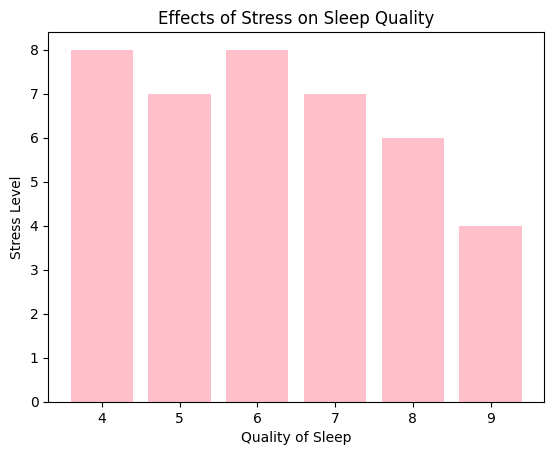

In [8]:
# visualizations
import matplotlib.pyplot as plt
# axis
quality_of_sleep = sleep_health['Quality of Sleep']
stress_level = sleep_health['Stress Level']
# correlation between stress level and quality of sleep
plt.bar(quality_of_sleep, stress_level, color="pink")
plt.title('Effects of Stress on Sleep Quality')
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')
plt.show()

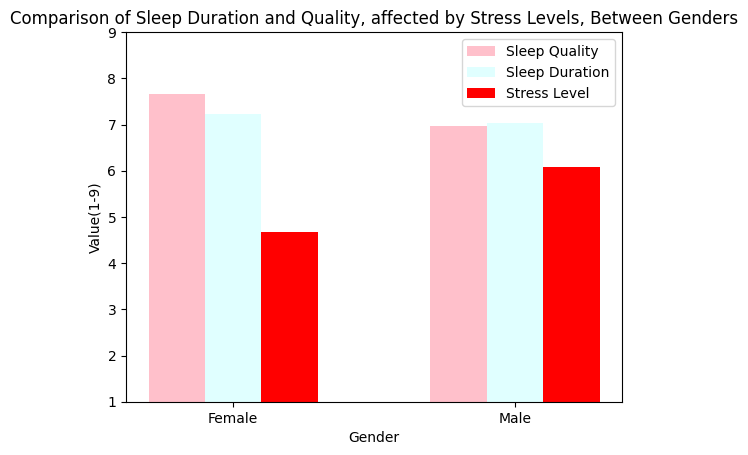

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# data on sleep duration, quality and stress level of each gender
grouped_gender = sleep_health.groupby('Gender')[['Quality of Sleep', 'Sleep Duration', 'Stress Level']].mean()

x_labels = grouped_gender.index # gets female and male
x = np.arange(len(x_labels)) # [0,1] creates numeric x positions

# create bar plot
fig, ax = plt.subplots()

ax.bar(x-0.2, grouped_gender['Quality of Sleep'], width = 0.2, label="Sleep Quality", color="pink")
ax.bar(x, grouped_gender['Sleep Duration'], width = 0.2, label='Sleep Duration', color="lightcyan")
ax.bar(x+0.2, grouped_gender['Stress Level'], width = 0.2, label='Stress Level', color='red')

ax.set_title('Comparison of Sleep Duration and Quality, affected by Stress Levels, Between Genders')
ax.set_xticks(x) 
ax.set_xticklabels(x_labels) # change back to female and male
ax.set_ylabel('Value(1-9)')
ax.set_xlabel('Gender')
ax.set_ylim(1,9)
ax.legend()

plt.show()

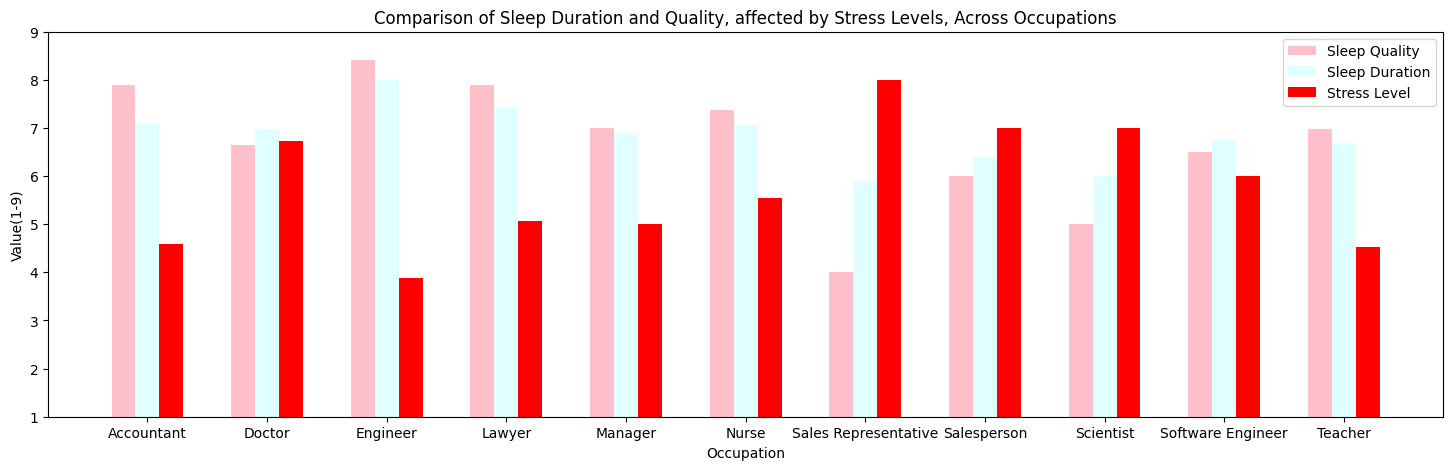

In [10]:
# data on sleep duration, quality and stress level of each gender
grouped_occ = sleep_health.groupby('Occupation')[['Quality of Sleep','Sleep Duration','Stress Level']].mean()

x_labels_occ = grouped_occ.index 
x_occ = np.arange(len(x_labels_occ)) 

# create bar plot
fig1, ax1 = plt.subplots(figsize=(18,5))

ax1.bar(x_occ-0.2, grouped_occ['Quality of Sleep'], width = 0.2, label="Sleep Quality", color="pink")
ax1.bar(x_occ, grouped_occ['Sleep Duration'], width = 0.2, label='Sleep Duration', color="lightcyan")
ax1.bar(x_occ+0.2, grouped_occ['Stress Level'], width = 0.2, label='Stress Level', color='red')

ax1.set_title('Comparison of Sleep Duration and Quality, affected by Stress Levels, Across Occupations')
ax1.set_xticks(x_occ) 
ax1.set_xticklabels(x_labels_occ) 
ax1.set_ylabel('Value(1-9)')
ax1.set_xlabel('Occupation')
ax1.set_ylim(1,9)
ax1.legend()
plt.xlim()

plt.show()